### 1.3.3 More elaborate arrays
Section contents
    More data types 
    Structure data types 
    maskedarray: dealing with (propagation of) missing data

#### 1.3.3.1 More data types
Casting

In [3]:
# "Bigger" type wins in mixed-type operations
import numpy as np
np.array([1,2,3]) + 1.5

array([2.5, 3.5, 4.5])

In [6]:
a = np.array([1,2,3])

a.dtype
a[0] = 1.9

In [8]:
a = np.array([1.7, 1.2, 1.6])

In [11]:
b = a.astype(int)
b

array([1, 1, 1])

In [12]:
a = np.array([1.2, 1.5, 1.6, 2.5, 3.5, 4.5])
b = np.around(a)
b

array([1., 2., 2., 2., 4., 4.])

In [14]:
c = np.around(a).astype(int)

In [15]:
c

array([1, 2, 2, 2, 4, 4])

## Different data type size
Integers (signed) 

    int8    8bits 
    int16   16bits 
    int32   32bits 
    int64   64bits 

In [17]:
np.array([1], dtype=int).dtype
np.iinfo(np.int32).max, 2**31 -1

(2147483647, 2147483647)

    unint8    8bits
    unint16   16bits
    unint32   32bits
    unint64   64bits

In [18]:
np.iinfo(np.uint32).max, 2**32-1

(4294967295, 4294967295)

    float16    16bits
    float32    32bits
    float64    64bits
    float96    96bits
    float128   128bits

In [21]:
np.finfo(np.float32).eps
np.finfo(np.float64).eps

2.220446049250313e-16

In [24]:
np.float32(1e-8) + np.float32(1) == 1,np.float64(1e-32) + np.float64(1) == 1

(True, True)

    complex64    two 32-bit floats
    complex128   two 64-bit floats
    complex192   two 96-bit floats, platform-dependent
    complex256   two 128-bit floats, platform-dependent

#### Smaller data types
If you don't know you need special data types, then you probably don't.
Conparison on using float32 instead of float64:
* Half the size in memory and on disk
* Half the memory bandwith required (may be a bit faster in some operations)

#### 1.3.3.2 Structureed data types 
    sensor_code    (4-character string)
    position       (float)
    value          (float)

In [37]:
samples = np.zeros((6,), dtype=[('sensor_code', 'S4'), ('position', float), ('value', float)])
samples, samples.ndim, samples.shape

(array([('', 0., 0.), ('', 0., 0.), ('', 0., 0.), ('', 0., 0.),
        ('', 0., 0.), ('', 0., 0.)],
       dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')]),
 1,
 (6,))

In [39]:
samples.dtype.names

('sensor_code', 'position', 'value')

In [40]:
samples[:] = [('ALFA', 1, 0.37), ('BETA', 1, 0.11), ('TAU', 1, 0.13), ('ALFA', 1.5, 0.37), ('ALFA', 3, 0.11), ('TAU', 1.2, 0.13)]
samples

array([('ALFA', 1. , 0.37), ('BETA', 1. , 0.11), ('TAU', 1. , 0.13),
       ('ALFA', 1.5, 0.37), ('ALFA', 3. , 0.11), ('TAU', 1.2, 0.13)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

In [41]:
samples['sensor_code']

array(['ALFA', 'BETA', 'TAU', 'ALFA', 'ALFA', 'TAU'], dtype='|S4')

In [42]:
samples['value']

array([0.37, 0.11, 0.13, 0.37, 0.11, 0.13])

In [44]:
samples[0]['sensor_code']

'ALFA'

In [48]:
samples[['position', 'value']]

array([(1. , 0.37), (1. , 0.11), (1. , 0.13), (1.5, 0.37), (3. , 0.11),
       (1.2, 0.13)], dtype=[('position', '<f8'), ('value', '<f8')])

In [49]:
samples[samples['sensor_code'] == 'ALFA']

array([('ALFA', 1. , 0.37), ('ALFA', 1.5, 0.37), ('ALFA', 3. , 0.11)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

#### 1.3.3.3 maskedarray: dealing with (propagation of) missing data
* For floats one could use NaN's, but masks work for all type:

In [50]:
x = np.ma.array([1, 2,3,4,], mask=[0, 1, 0, 1])
x

masked_array(data=[1, --, 3, --],
             mask=[False,  True, False,  True],
       fill_value=999999)

In [51]:
y = np.ma.array([1, 2, 3, 4], mask=[0, 1, 1, 1])
x + y

masked_array(data=[2, --, --, --],
             mask=[False,  True,  True,  True],
       fill_value=999999)

In [53]:
# Masking version of common functions
np.ma.sqrt([1, -1, 2, -2])

masked_array(data=[1.0, --, 1.4142135623730951, --],
             mask=[False,  True, False,  True],
       fill_value=1e+20)

#### 1.2.4.1 Polynomials
NumPy also contains polynomials in different bases:
For example, $3x^2 + 2x -1$

In [55]:
p = np.poly1d([3,2,-1])
p(0), p.roots, p.order

(-1, array([-1.        ,  0.33333333]), 2)

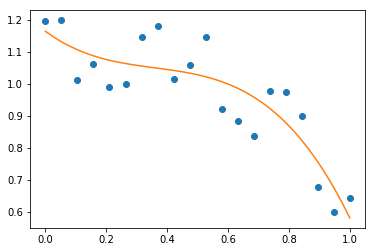

In [62]:
% matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x,y,3))
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-')

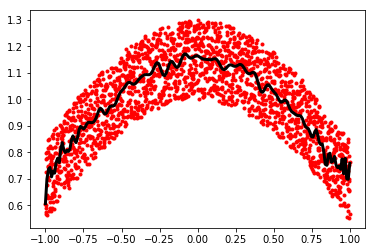

In [65]:
x = np.linspace(-1, 1, 2000)
y = np.cos(x) + 0.3*np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)
t = np.linspace(-1, 1, 200)
plt.plot(x, y, 'r.')
plt.plot(t, p(t), 'k-', lw=3)

#### 1.3.4.2 Loading data files
Text files
Example: **populations.txt**

----
    \# year  hare    lynx    carrot
    1900     30e3    4e3     48300
    1901     47.2e3  6.1e3   48200
    1902 70.2e3  9.8e3  41500
    1903 77.4e3  35.2e3   38200

In [88]:
data = np.loadtxt('populations.txt')

In [69]:
np.savetxt('pop2.txt', data)
data2 = np.loadtxt('pop2.txt')

In [73]:
# reminder : navigating the filesystem with ipython
!pwd

/home/lee/git/learn/sklearn/tutorials


In [74]:
ls

clf.pkl                                 ridge_coefficient.ipynb
dashboard_demo.ipynb                    scientific_data_processing.ipynb
demo.py                                 scikit-learn_algorithm_cheat-sheet.png
demo.pyc                                scipy_learning_note_2.ipynb
intro.ipynb                             scipy_lecture_note.ipynb
plot_digits_classification_exercise.py  svm_gui.py
plot_iris_exercise.py                   test.pkl
pop2.txt                                test.py
populations.txt                         Working_with_Text_Data.ipynb


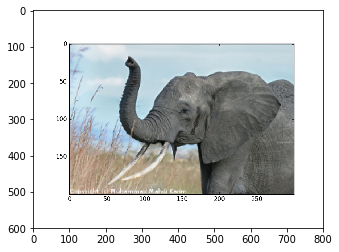

In [76]:
# Images
# using matplotlib
plt.figure()
img = plt.imread('elephant.png')
plt.imshow(img)

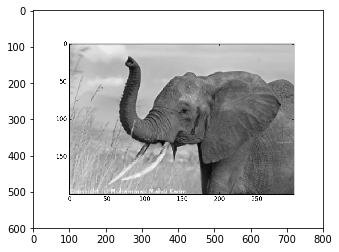

In [80]:
# Red channel displayed in grey
plt.figure()
img_red = img[:, :, 0]
plt.imshow(img_red, cmap=plt.cm.gray)

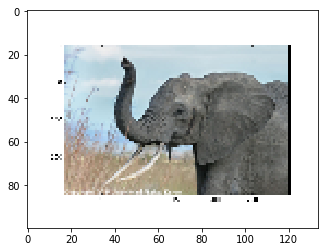

In [81]:
plt.figure()
img_tiny = img[::6, ::6]
plt.imshow(img_tiny, interpolation='nearest')


# Mandelbrot set
Compute the Mandelbrot fractal and plot it

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-1, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)
    
    c = x[:, newaxis] + 1j*y[newaxis,:]
    
    # Mandelbrot iteration
    z = c
    for j in range(N_max):
        z = z ** 2 + c
    
    mandelbrot_set = (abs(z) < some_threshold)
    return mendelbrot_set

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in square
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in square
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


NameError: global name 'mendelbrot_set' is not defined

In [83]:
y = np.linspace(-1.5, 1.5, 10)

In [87]:
1j * y[np.newaxis, :], y[:, np.newaxis]

(array([[-0.-1.5j       , -0.-1.16666667j, -0.-0.83333333j,
         -0.-0.5j       , -0.-0.16666667j,  0.+0.16666667j,
          0.+0.5j       ,  0.+0.83333333j,  0.+1.16666667j,
          0.+1.5j       ]]), array([[-1.5       ],
        [-1.16666667],
        [-0.83333333],
        [-0.5       ],
        [-0.16666667],
        [ 0.16666667],
        [ 0.5       ],
        [ 0.83333333],
        [ 1.16666667],
        [ 1.5       ]]))